In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_xmin import ds2s_OV_xmin
from lib.funcs import *

In [17]:
x_min = 0.01  # 車両の長さ: 4.7mで換算

L = 10.0  # レーンの長さ: 470m
n_0 = 5

x_0 = ((4.7+3.0)/4.7) * x_min  # 最小車間距離: 車両の長さ+3mで換算
v_0 = (1000/36)/4.7 * x_min  # 車両の最高速度: 法定速度100km/hで換算
dt = 1.0  # 時間差分1秒
dx = 0.01  # テキトー。基本図がいい感じになるように調整

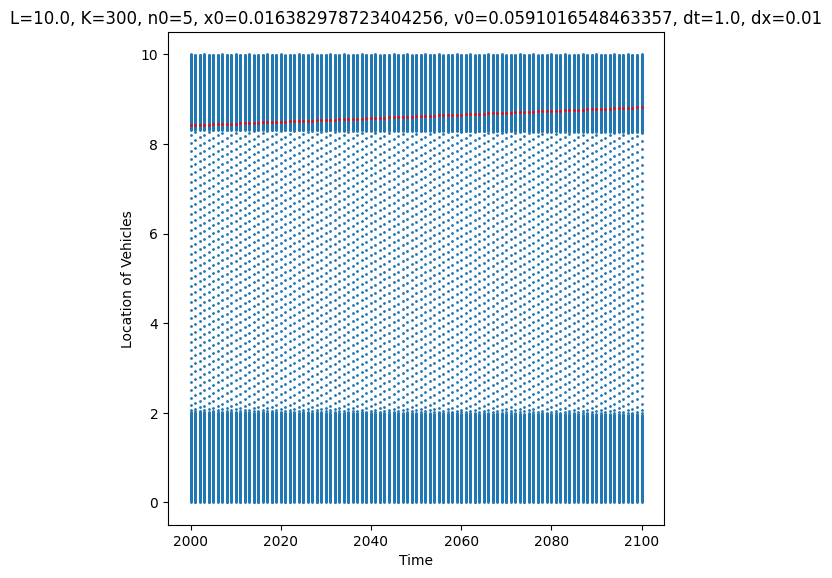

In [18]:
model = ds2s_OV_xmin(
	L=L,
	K=300,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_min=x_min,
	x_init=np.array([x_min * i for i in range(300)]),
	n_max=2110
)
model.simulate()
plot_pattern(model, 2000, 2100)

In [19]:
data = {}
for id, K in enumerate(range(1000)):
	print("\rid={}".format(id), end="")
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		x_min=x_min,
		dt=dt,
		dx=dx,
		x_init=np.array([L/K * i for i in range(K)], dtype=np.float64),
		n_max=105,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {"50 100": model.flow(50, 100)}
	data[id] = js

id=23

c:\projects\python\s2s-OV-model\ds2s-OV\lib\ds2s_OV.py:109: RuntimeWarning: divide by zero encountered in divide
  np.log(1.0 + 1.0 / e1)
c:\projects\python\s2s-OV-model\ds2s-OV\lib\ds2s_OV.py:111: RuntimeWarning: divide by zero encountered in divide
  - np.log(1.0 + 1.0 / e2)
c:\projects\python\s2s-OV-model\ds2s-OV\lib\ds2s_OV.py:109: RuntimeWarning: invalid value encountered in subtract
  np.log(1.0 + 1.0 / e1)


id=999

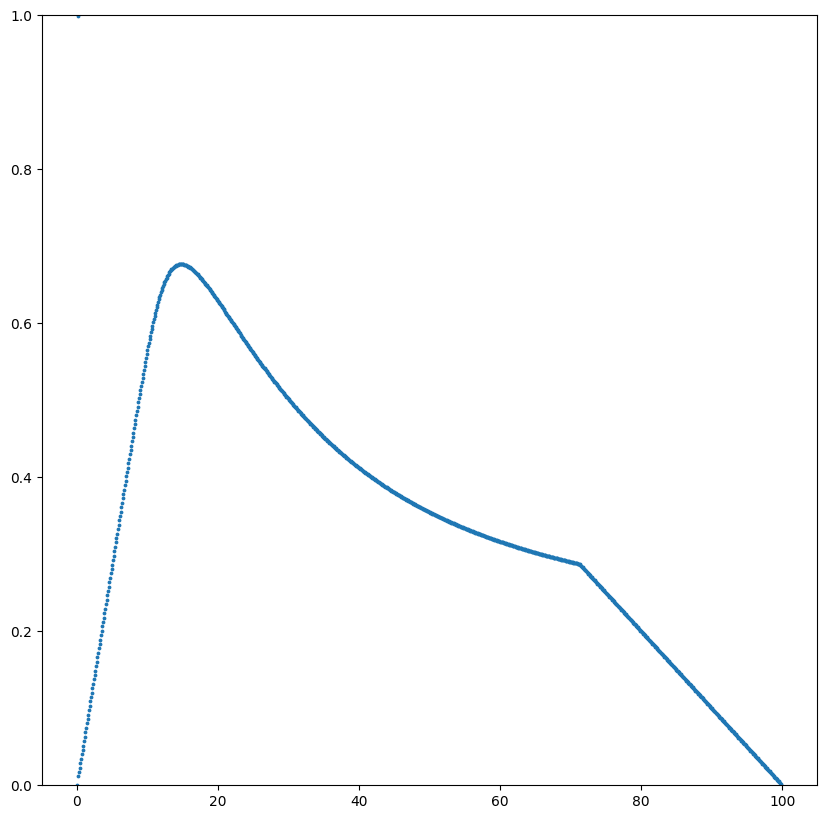

In [20]:
density = [data[id]["density"] for id in range(1000)]
flow = [data[id]["flow"]["50 100"] for id in range(1000)]
plt.figure(figsize=(10, 10))
# plt.xlim(0, 10.0)
plt.ylim(0, 1.0)
plt.scatter(density, flow, s=3)

In [23]:
data = {}
for id, K in enumerate(range(1000)):
	print("\rid={}".format(id), end="")
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		x_min=x_min,
		dt=dt,
		dx=dx,
		x_init=np.array([x_min * i for i in range(K)], dtype=np.float64),
		n_max=2105,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {"2000 2105": model.flow(2000, 2100)}
	data[id] = js

id=14

c:\projects\python\s2s-OV-model\ds2s-OV\lib\ds2s_OV.py:111: RuntimeWarning: overflow encountered in divide
  - np.log(1.0 + 1.0 / e2)
c:\projects\python\s2s-OV-model\ds2s-OV\lib\ds2s_OV.py:109: RuntimeWarning: overflow encountered in divide
  np.log(1.0 + 1.0 / e1)


id=999

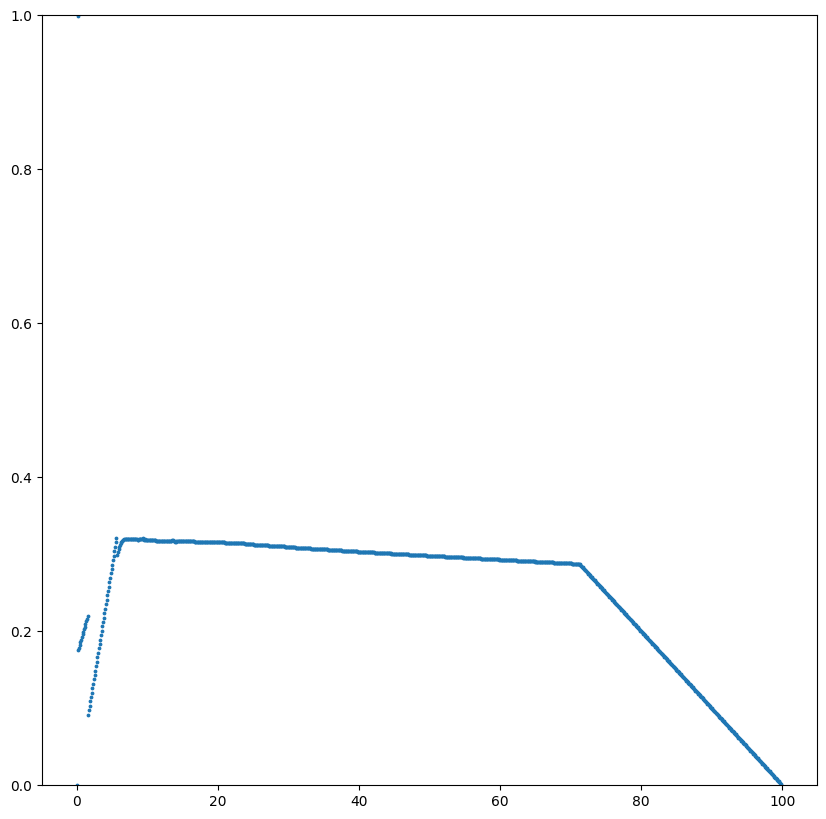

In [25]:
density = [data[id]["density"] for id in range(1000)]
flow = [data[id]["flow"]["2000 2105"] for id in range(1000)]
plt.figure(figsize=(10, 10))
# plt.xlim(0, 10.0)
plt.ylim(0, 1.0)
plt.scatter(density, flow, s=3)